In [381]:
import numpy as np  # import math functions
import matplotlib.pyplot as plt  # import plotting functions
from scipy.special import factorial  # import just the factorial function
import scipy.linalg  # import more linear algebra, particularly for matrix exponentiation

<h3> Taylor/Maclaurin series expansion to $sin(x)$ about $x=0$</h3>

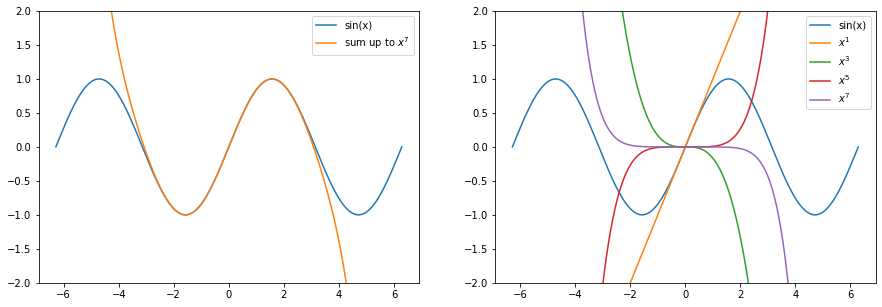

In [380]:
x = np.linspace(-2*np.pi,2*np.pi,1000)

def sin_approx(x,n):
    """A function that approximates sin(x) up to an arbitrary nth order polynomial."""
    out = []
    for i in range(0,n+1):   # loops until n, not n+1
        out.append( (-1)**(i) * x**(2*i+1)/factorial(2*i+1))
    return out

n=3
y = np.sin(x)
out = sin_approx(x,n)
out_sum = np.sum(out, axis=0)

fig, axes = plt.subplots(1,2, figsize=(15,5))  # create a figure with two subplots

# plot f(x) and the approximate summation
axes[0].plot(x, y, label='sin(x)')
axes[0].plot(x, out_sum, label='sum up to $x^{'+'{}'.format(2*n+1)+'}$')
axes[0].set_ylim([-2,2])  # limit the y-range, which otherwise tends to get very large as polynomials go to infinity
axes[0].legend()  # add a legend to the plot, corresponding to the "label" terms on each plt.plot function

# plot f(x) and each term individually
axes[1].plot(x, y, label='sin(x)')
for i in range(len(out)):
    axes[1].plot(x,out[i], label='$x^{'+'{}'.format(2*i+1)+'}$')
axes[1].set_ylim([-2,2])
axes[1].legend();

<h3> Boas 1.1.16 </h3>

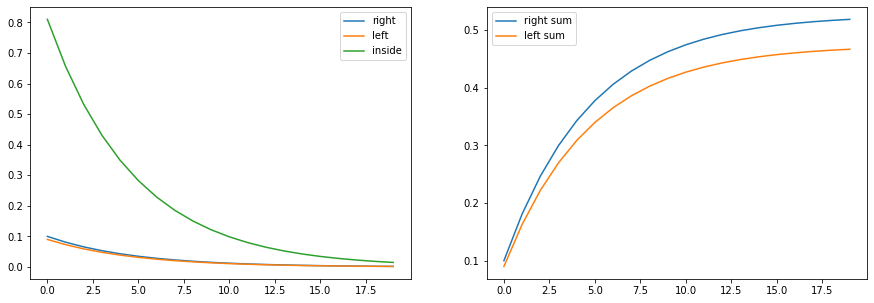

In [274]:
def S_rep(r,n):
    """A function that models particles bouncing back and forth between partially reflective mirrors."""
    right = np.empty(n)  # amount that exits at x=1 at each iteration
    left = np.empty(n)   # amount that exits at x=0 at each iteration
    inside = np.empty(n)  # amount that is left in cavity after each iteration (starts at 1 before any losses)

    # for i = 0
    right[0] = 1-r
    left[0] = r*(1-r)
    inside[0] = r*r

    for i in range(1,n):
        
        # amount that exits to the right
        right[i] = inside[i-1]*(1-r)
        
        # amount that exists to the left
        left[i] = inside[i-1]*r*(1-r)
        
        # amount that is left after right and left bounces
        inside[i] = inside[i-1]*(r**2)
    
    return right, left, inside

fig, axes = plt.subplots(1,2,figsize=(15,5))
right, left, inside = S_rep(.9,20)
axes[0].plot(right,label='right')
axes[0].plot(left,label='left')
axes[0].plot(inside,label='inside')
axes[0].legend()

axes[1].plot(np.cumsum(right),label='right sum')
axes[1].plot(np.cumsum(left),label='left sum')
axes[1].legend();

Text(0, 0.5, 'leakage fraction')

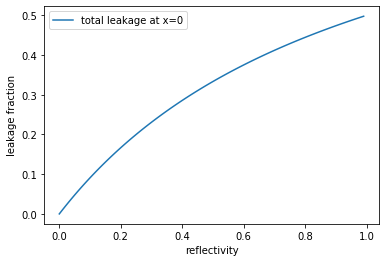

In [278]:
# plot how the summation changes with reflectivity of the mirrors
r=np.arange(0, 1, .01)
plt.plot(r, r/(1+r), label='total leakage at x=0')
plt.legend();
plt.xlabel('reflectivity')
plt.ylabel('leakage fraction')

<h3>different ways of entering matrices<h3>

In [298]:
print("arange:\n",np.arange(0,10,.1))  # specify the range and step-size
print()
print("linspace:\n",np.linspace(0,10,20))  # specify the range and number of steps
print()
print("force integer type:\n",np.linspace(0,10,20,dtype=int))  # force the array to truncate to integer types
print()
print("zeros:\n",np.zeros((3,4)))
print()
print("zeros:\n",np.ones((3,4)))

arange:
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]

linspace:
 [ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]

force integer type:
 [ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9 10]

zeros:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

zeros:
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


<h3>complex numbers and matrices</h3>

In [314]:
# python uses 1j to represent the complex number i.  j by itself does not work.

a = 3*np.identity(3)+5j*np.ones(3)  # a matrix with 3+5i on the diagonal and 5i on the off-diagonals

print("complex matrix:\n", a)
print()
print("type:", a.dtype)
print()
print("real part:\n", np.real(a))
print()
print("imaginary part:\n", np.imag(a))
print()
print("magnitude:\n", np.abs(a))
print()
print("phase:\n", np.angle(a)*180/np.pi)

complex matrix:
 [[3.+5.j 0.+5.j 0.+5.j]
 [0.+5.j 3.+5.j 0.+5.j]
 [0.+5.j 0.+5.j 3.+5.j]]

type: complex128

real part:
 [[3. 0. 0.]
 [0. 3. 0.]
 [0. 0. 3.]]

imaginary part:
 [[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]

magnitude:
 [[5.83095189 5.         5.        ]
 [5.         5.83095189 5.        ]
 [5.         5.         5.83095189]]

phase:
 [[59.03624347 90.         90.        ]
 [90.         59.03624347 90.        ]
 [90.         90.         59.03624347]]


<h3>Plot a complex function in 3D</h3>

C:\Users\marty\Miniconda3\envs\PHYS301a\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


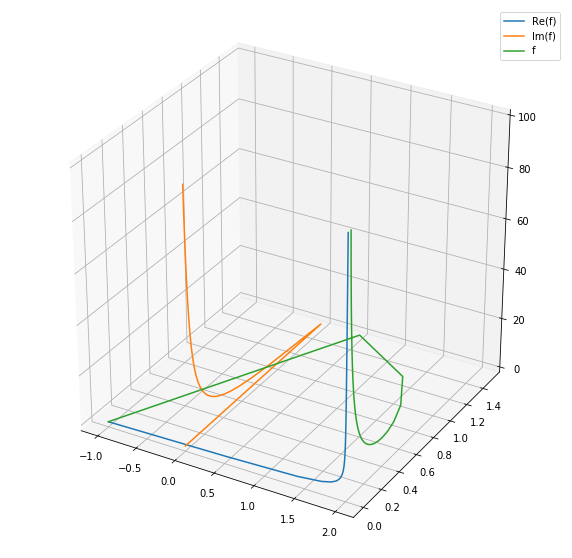

In [315]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# create our function
t = np.linspace(0,100,100)
f = (1j+2*t)/(t-1j)

ax.plot(np.real(f), np.zeros_like(f), t, label='Re(f)')
ax.plot(np.zeros_like(f), np.imag(f), t, label='Im(f)')
ax.plot(np.real(f), np.imag(f), t, label='f')
ax.legend()
plt.show()

<h3>Symbolic evaluation of series</h3>

In [316]:
from sympy import Symbol, sin, cos, series
x = Symbol('x')

series(x/sin(x),x,x0=0,n=8)

1 + x**2/6 + 7*x**4/360 + 31*x**6/15120 + O(x**8)

<h2>Linear algebra</h2>

In [326]:
# define a list of lists
A=[[3,5],[2,3]]

print("type:", type(A),'\n')

print("list of lists:\n",A,'\n')

# most numpy functions will take in a list and convert it automatically
print("determinant:",np.linalg.det(A))

type: <class 'list'> 

list of lists:
 [[3, 5], [2, 3]] 

determinant: -0.9999999999999996


In [329]:
# you can manually cast to a numpy array to have more control over the conversion

A=np.array([[3,5],[2,3]], dtype=np.float64)
print("type:", type(A),'\n')
print("array:\n",A,'\n')

# you also then have access to more information about the array
print("dtype:",A.dtype,'\n')
print("shape:",A.shape,'\n')
print("size",A.size,'\n')

# memory space is much more efficient for numpy arrays (as opposed to lists), so they're usually always preferable
print('determinant:',np.linalg.det(A))

type: <class 'numpy.ndarray'> 

array:
 [[3. 5.]
 [2. 3.]] 

dtype: float64 

shape: (2, 2) 

size 4 

determinant: -0.9999999999999996


<h3>Plot a matrix</h3>

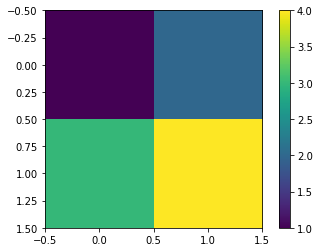

In [330]:
plt.imshow(np.array([[1,2],[3,4]]));
plt.colorbar();

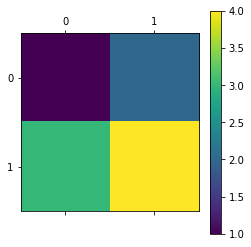

In [331]:
plt.matshow(np.array([[1,2],[3,4]]));
plt.colorbar();

In [332]:
# identity matrix
A=np.identity(3)
print('identity:\n', A, '\n')
print('determinant:',np.linalg.det(A))

identity:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

determinant: 1.0


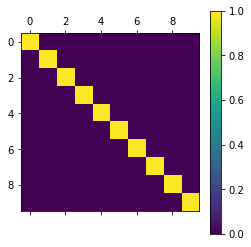

In [333]:
plt.matshow(np.identity(10))
plt.colorbar();

<h3>Matrix multiplication</h3>

In [341]:
# element-wise vs. matrix multiplication
A=np.array([[1,1],[2,2]])
B=np.array([[1,2],[3,4]])

print('A:\n', A, '\n')
print('B:\n', B, '\n')

out = np.empty((2,2))
for i in range(2):
    for j in range(2):
        out[i,j] = A[i,j]*B[i,j]
print('Aij*Bij element-wise (manually via a for-loop):\n', out, '\n')

print('A*B (element-wise):\n',A*B, '\n')

print('np.matmul(A,B) (matrix multiplication):\n', np.matmul(A,B), '\n')

print('np.dot(A,B) (matrix multiplication):\n', np.dot(A,B),'\n')

A:
 [[1 1]
 [2 2]] 

B:
 [[1 2]
 [3 4]] 

Aij*Bij element-wise (manually via a for-loop):
 [[1. 2.]
 [6. 8.]] 

A*B (element-wise):
 [[1 2]
 [6 8]] 

np.matmul(A,B) (matrix multiplication):
 [[ 4  6]
 [ 8 12]] 

np.dot(A,B) (matrix multiplication):
 [[ 4  6]
 [ 8 12]] 



In [342]:
# element-wise powers
A = np.array([[1,2],[3,4]])
print('A:\n', A, '\n')
print('A*A (element-wise square):\n', A*A, '\n')
print('A**2 (element-wise square):\n', A**2, '\n')

A:
 [[1 2]
 [3 4]] 

A*A (element-wise square):
 [[ 1  4]
 [ 9 16]] 

A**2 (element-wise square):
 [[ 1  4]
 [ 9 16]] 



In [344]:
# matrix powers
A = np.array([[3,4],[5,6]])
print('A:\n', A, '\n')

print('np.matmul(A,A) matrix square:\n', np.matmul(A,A), '\n')
print('np.dot(A,A) matrix square:\n', np.dot(A,A), '\n')
print('np.linalg.matrix_power(A,10) matrix to 10th power:\n', np.linalg.matrix_power(A,10), '\n')

A:
 [[3 4]
 [5 6]] 

np.matmul(A,A) matrix square:
 [[29 36]
 [45 56]] 

np.dot(A,A) matrix square:
 [[29 36]
 [45 56]] 

np.linalg.matrix_power(A,10) matrix to 10th power:
 [[ 1508850509  1876101876]
 [-1949839951 -1379040380]] 



In [347]:
# matrix inverse

A=np.array([[3,4],[5,6]])
print('A:\n', A, '\n')
B=np.linalg.inv(A)
print('A^-1:\n', B, '\n')

print('A.A^-1:', np.dot(A,B))  # this should give the identity matrix if the inverse was calculated correctly

A:
 [[3 4]
 [5 6]] 

A^-1:
 [[-3.   2. ]
 [ 2.5 -1.5]] 

A.A^-1: [[ 1.00000000e+00  0.00000000e+00]
 [-1.77635684e-15  1.00000000e+00]]


I(3):
 [[1. 0.]
 [0. 1.]] 

pauli_x:
 [[0 1]
 [1 0]] 

I(3) X pauli_x:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]] 

pauli_y X pauli_x:
 [[0.+0.j 0.+0.j 0.-0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.-1.j 0.-0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]]


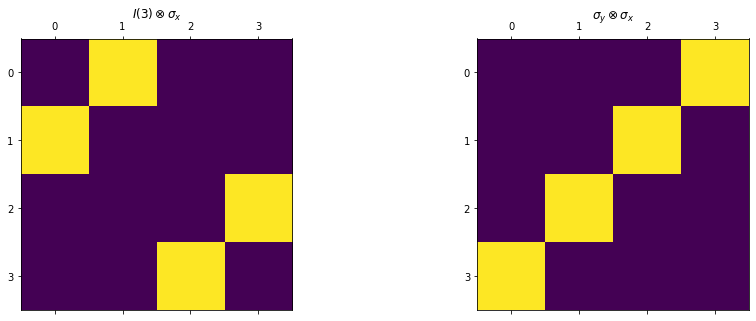

In [365]:
# Kronecker product

pauli_x = np.array([[0,1],[1,0]])
pauli_y = np.array([[0,-1j],[1j,0]])
pauli_z = np.array([[1,0],[0,-1]])

i = np.identity(2)

print('I(3):\n', i, '\n')
print('pauli_x:\n', pauli_x, '\n')
print('I(3) X pauli_x:\n',np.kron(i,pauli_x),'\n')
print('pauli_y X pauli_x:\n',np.kron(pauli_y,pauli_x))
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].matshow(np.kron(i,pauli_x))
axes[0].set_title('$I(3) \otimes \sigma_x$')
axes[1].matshow(np.abs(np.kron(pauli_y,pauli_x)))
axes[1].set_title('$\sigma_y \otimes \sigma_x$');

<h3>Quiz 1 questions</h3>

<h3>Boas 1.1.12</h3>

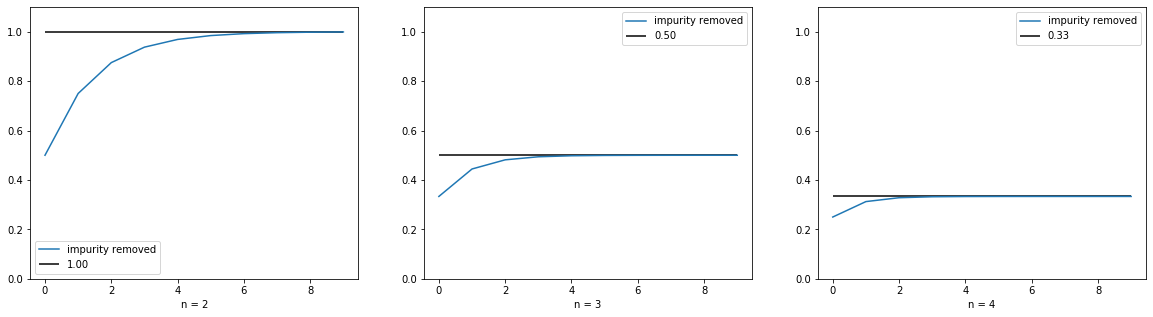

In [372]:
def impurity(n,ax):
    k = 10
    x = np.arange(k)
    y = np.empty(k)
    y[0] = 1/n
    for i in x[1:]:
        y[i] = y[i-1]*(1/n)
    removed = np.cumsum(y)
    limit = (1/n)/(1-(1/n))
    ax.set_xlabel('n = {}'.format(n))
    ax.plot(x,removed,label='impurity removed')
    ax.hlines(limit,x[0],x[-1],label='{:.2f}'.format(limit))
    ax.set_ylim([0,1.1])
    ax.legend()

fig, axes = plt.subplots(1, 3, figsize=(20,5))
impurity(2,axes[0])
impurity(3,axes[1])
impurity(4,axes[2])

<h3>Boas 1.13.10</h3>

In [371]:
from sympy import Symbol, sin, cos, series
x = Symbol('x')

series(sin(x),x,x0=0,n=16)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 - x**11/39916800 + x**13/6227020800 - x**15/1307674368000 + O(x**16)

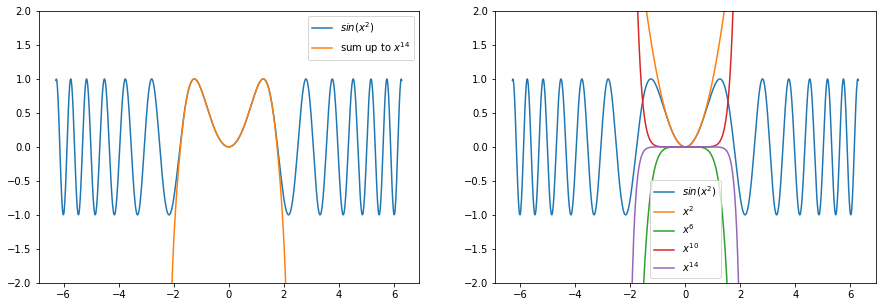

In [378]:
x = np.linspace(-2*np.pi,2*np.pi,1000)

def f(x):
    return np.sin(x**2)

def f_approx(x,n):
    out = []
    for i in range(0,n+1):   # loops until n, not n+1
        out.append( (-1)**(i) * x**(4*i+2)/factorial(2*i+1))
    return out

n=3
y = f(x)
out = f_approx(x,n)
out_sum = np.sum(out, axis=0)

fig, axes = plt.subplots(1,2, figsize=(15,5))  # create a figure with two subplots

# plot f(x) and the approximate summation
axes[0].plot(x, y, label='$sin(x^2)$')
axes[0].plot(x, out_sum, label='sum up to $x^{'+'{}'.format(4*n+2)+'}$')
axes[0].set_ylim([-2,2])  # limit the y-range, which otherwise tends to get very large as polynomials go to infinity
axes[0].legend()  # add a legend to the plot, corresponding to the "label" terms on each plt.plot function

# plot f(x) and each term individually
axes[1].plot(x, y, label='$sin(x^2)$')
for i in range(len(out)):
    axes[1].plot(x, out[i], label='$x^{'+'{}'.format(4*i+2)+'}$')

axes[1].set_ylim([-2,2])
axes[1].legend();

<h3>Boas 1.13.40</h3>

In [373]:
from sympy import Symbol, series
x = Symbol('x')

series(1/x, x, x0=1, n=5)

2 + (x - 1)**2 - (x - 1)**3 + (x - 1)**4 - x + O((x - 1)**5, (x, 1))

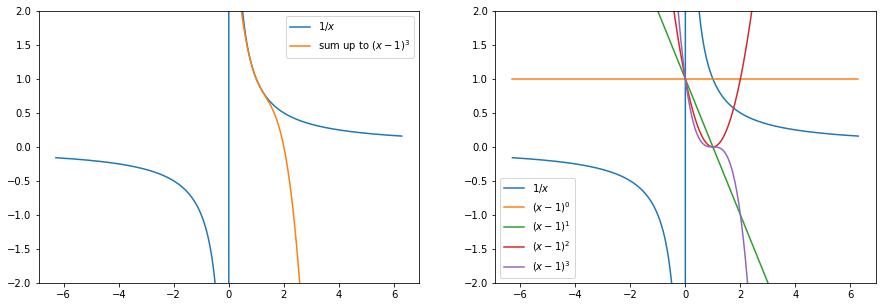

In [379]:
x = np.linspace(-2*np.pi,2*np.pi,1000)

def f(x):
    return 1/x

def f_approx(x,n):
    out = []
    for i in range(0,n+1):   # loops until n, not n+1
        out.append( (-1)**(i) * (x-1)**i)
    return out

n=3
y = f(x)
out = f_approx(x,n)
out_sum = np.sum(out, axis=0)

fig, axes = plt.subplots(1,2, figsize=(15,5))  # create a figure with two subplots

# plot f(x) and the approximate summation
axes[0].plot(x, y, label='$1/x$')
axes[0].plot(x, out_sum, label='sum up to $(x-1)^{'+'{}'.format(n)+'}$')
axes[0].set_ylim([-2,2])  # limit the y-range, which otherwise tends to get very large as polynomials go to infinity
axes[0].legend()  # add a legend to the plot, corresponding to the "label" terms on each plt.plot function

# plot f(x) and each term individually
axes[1].plot(x, y, label='$1/x$')
for i in range(len(out)):
    axes[1].plot(x, out[i], label='$(x-1)^{'+'{}'.format(i)+'}$')

axes[1].set_ylim([-2,2])
axes[1].legend();

<h3>Matrix exponentiation</h3>

In [387]:
# matrix exponentiation

# matrix exponents

A = np.array([[1,0,0],[0,2,0],[0,0,3]])
print('A:\n', A, '\n')
print('np.e**A (element-wise exponent):\n', np.e**A, '\n')  # element-wise exponent
print('np.exp(A) (element-wise exponent):\n', np.exp(A), '\n')  # element-wise exponent
print('scipy.linalg.expm(A) (matrix exponent e^A):\n', scipy.linalg.expm(A), '\n')  # matrix exponent
print('2**A (element-wise exponent):\n', 2**A, '\n')  #element-wise exponent
print('scipy.linalg.expm(np.log(2)*A)) (matrix exponent 2^A):\n', scipy.linalg.expm(np.log(2)*A), '\n')  # matix exponent

A:
 [[1 0 0]
 [0 2 0]
 [0 0 3]] 

np.e**A (element-wise exponent):
 [[ 2.71828183  1.          1.        ]
 [ 1.          7.3890561   1.        ]
 [ 1.          1.         20.08553692]] 

np.exp(A) (element-wise exponent):
 [[ 2.71828183  1.          1.        ]
 [ 1.          7.3890561   1.        ]
 [ 1.          1.         20.08553692]] 

scipy.linalg.expm(A) (matrix exponent e^A):
 [[ 2.71828183  0.          0.        ]
 [ 0.          7.3890561   0.        ]
 [ 0.          0.         20.08553692]] 

2**A (element-wise exponent):
 [[2 1 1]
 [1 4 1]
 [1 1 8]] 

scipy.linalg.expm(np.log(2)*A)) (matrix exponent 2^A):
 [[2. 0. 0.]
 [0. 4. 0.]
 [0. 0. 8.]] 



In [225]:
# solving a system of equations
a = np.array([[3,1], [1,2]])
b = np.array([9,8])
x = np.linalg.solve(a, b)
print(x)

[2. 3.]


In [238]:
ainv = np.linalg.inv(a)
print(ainv)
print("x,y=",np.dot(ainv,b))

[[ 0.4 -0.2]
 [-0.2  0.6]]
x,y= [2. 3.]


In [242]:
# checking to see if something is within floating-point error
A=np.random.random((3,3))
print(A)
print()
Ainv = np.linalg.inv(A)
print(Ainv)
print()
results = (np.dot(A,Ainv))
print(results)
print()
truth = (results == np.identity(3))
print(truth)
print()
print("Is it exactly equal to the idenity?",np.prod(truth,dtype=bool))
print()
print("Is it very very close to the idenity?",np.allclose(np.dot(A,Ainv),np.identity(3)))

[[0.22143986 0.33100823 0.46446491]
 [0.79092195 0.47437222 0.53490191]
 [0.13888984 0.35576403 0.85034549]]

[[-4.1982047   2.29003263  0.85256633]
 [11.78721625 -2.43897233 -4.90405068]
 [-4.24577969  0.6463683   3.08847649]]

[[ 1.00000000e+00 -3.51355457e-17 -1.88000464e-16]
 [-6.88619249e-17  1.00000000e+00 -3.02693801e-16]
 [-1.32210093e-18 -1.16660464e-17  1.00000000e+00]]

[[False False False]
 [False False False]
 [False False  True]]

Is it exactly equal to the idenity? False

Is it very very close to the idenity? True


In [8]:
def rot(theta):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

print(rot(np.pi))

[[-1.0000000e+00 -1.2246468e-16]
 [ 1.2246468e-16 -1.0000000e+00]]


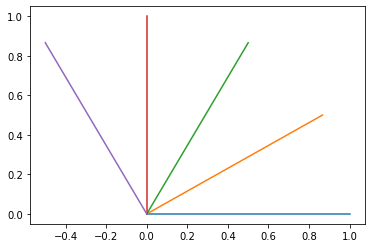

In [27]:
def vecplot(a):
    plt.plot([0,a[0]],[0,a[1]])

a=np.array([1,0])
vecplot(a)
b=np.dot(rot(np.pi/6),a)
vecplot(b)
c=np.dot(rot(np.pi/6),b)
vecplot(c)
d=np.dot(rot(np.pi/6),c)
vecplot(d)
e=np.dot(rot(np.pi/6),d)
vecplot(e)

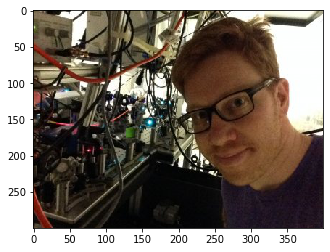

In [32]:
from PIL import Image
import requests
from io import BytesIO

url = r'https://www.bates.edu/faculty-expertise/wp-content/blogs.dir/263/files/2019/07/lichtman_photo-400x300.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)

uint8


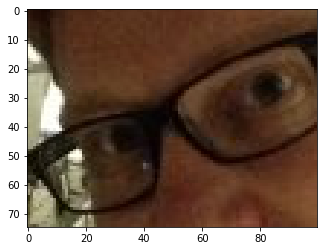

In [33]:
a=np.array(img)
print(a.dtype)
plt.imshow(a[100:175,200:300]);

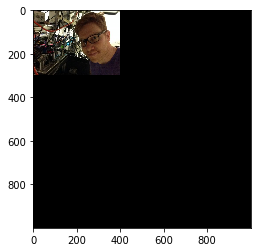

In [244]:
img2 = np.zeros((1000,1000,3),dtype=np.uint8)
img2[0:300,0:400,:]=np.array(img)
plt.imshow(img2)

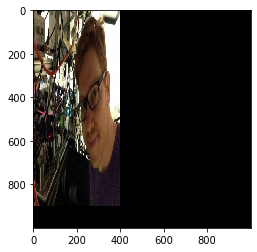

In [246]:
ind = np.indices(img2.shape[:2])  # get the x,y indices of each point in the image
#ind[0] -= int(img2.shape[0]/2)    # re-center the x indices to put the origin in the middle of the image
#ind[1] -= int(img2.shape[1]/2)    # re-center the y indices to put the origin in the middle of the image

#plt.imshow(ind[0])
#plt.colorbar()

S = np.array([[3,0],[0,1]])  # create a stretch

ind2 = np.dot(ind.T,np.linalg.inv(S)).T.astype(int)  # multiply to rotate the coordinate indices

#ind2[0] += int(img2.shape[0]/2)    # re-center the x indices to put the origin in the middle of the image
#ind2[1] -= int(img2.shape[1]/2)    # re-center the y indices to put the origin in the middle of the image

#print(ind2.shape)
#plt.figure()
#plt.imshow(ind2[0,:,:])
#plt.colorbar()

xmin = np.amin(ind[0])
ymin = np.amin(ind[1])
xmax = np.amax(ind[0])
ymax = np.amax(ind[1])

img3 = np.empty_like(img2)
for i in range(ind2.shape[1]):
    for j in range(ind2.shape[2]):
        x = ind2[0,i,j]
        y = ind2[1,i,j]
        if (xmin <= x <= xmax) and (ymin < y < ymax):
            img3[i,j] = img2[x,y]
        else:
            img3[i,j] = 0

plt.imshow(img3)

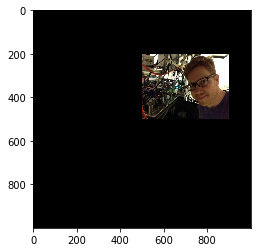

In [216]:
img2 = np.zeros((1000,1000,3),dtype=np.uint8)
img2[200:500,500:900,:]=np.array(img)
plt.imshow(img2)

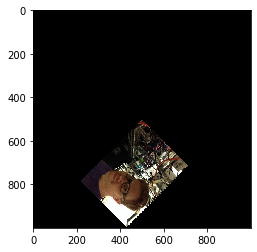

In [219]:
ind = np.indices(img2.shape[:2])  # get the x,y indices of each point in the image
ind[0] -= int(img2.shape[0]/2)    # re-center the x indices to put the origin in the middle of the image
ind[1] -= int(img2.shape[1]/2)    # re-center the y indices to put the origin in the middle of the image

#plt.imshow(ind[0])
#plt.colorbar()

R=rot(135*np.pi/180)  # create a rotation matrix
ind2 = np.dot(ind.T,np.linalg.inv(R)).T.astype(int)  # multiply to rotate the coordinate indices

ind2[0] += int(img2.shape[0]/2)    # re-center the x indices to put the origin in the middle of the image
ind2[1] -= int(img2.shape[1]/2)    # re-center the y indices to put the origin in the middle of the image

#print(ind2.shape)
#plt.figure()
#plt.imshow(ind2[0,:,:])
#plt.colorbar()

xmin = np.amin(ind[0])
ymin = np.amin(ind[1])
xmax = np.amax(ind[0])
ymax = np.amax(ind[1])

img3 = np.empty_like(img2)
for i in range(ind2.shape[1]):
    for j in range(ind2.shape[2]):
        x = ind2[0,i,j]
        y = ind2[1,i,j]
        if (xmin <= x <= xmax) and (ymin < y < ymax):
            img3[i,j] = img2[x,y]
        else:
            img3[i,j] = 0

plt.imshow(img3)

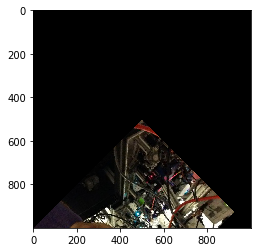

In [222]:
ind = np.indices(img2.shape[:2])  # get the x,y indices of each point in the image
ind[0] -= int(img2.shape[0]/2)    # re-center the x indices to put the origin in the middle of the image
ind[1] -= int(img2.shape[1]/2)    # re-center the y indices to put the origin in the middle of the image

#plt.imshow(ind[0])
#plt.colorbar()

R=rot(135*np.pi/180)  # create a rotation matrix
S= 2*np.identity(2)
Q = np.dot(R,S)

ind2 = np.dot(ind.T,np.linalg.inv(Q)).T.astype(int)  # multiply to rotate the coordinate indices

ind2[0] += int(img2.shape[0]/2)    # re-center the x indices to put the origin in the middle of the image
ind2[1] -= int(img2.shape[1]/2)    # re-center the y indices to put the origin in the middle of the image

#print(ind2.shape)
#plt.figure()
#plt.imshow(ind2[0,:,:])
#plt.colorbar()

xmin = np.amin(ind[0])
ymin = np.amin(ind[1])
xmax = np.amax(ind[0])
ymax = np.amax(ind[1])

img3 = np.empty_like(img2)
for i in range(ind2.shape[1]):
    for j in range(ind2.shape[2]):
        x = ind2[0,i,j]
        y = ind2[1,i,j]
        if (xmin <= x <= xmax) and (ymin < y < ymax):
            img3[i,j] = img2[x,y]
        else:
            img3[i,j] = 0

plt.imshow(img3)